In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [2]:
train_dataset = pd.read_csv('updated_train.csv')
label_encoder = LabelEncoder()
train_dataset['Sex'] = label_encoder.fit_transform(train_dataset['Sex'])

In [3]:
from sklearn.model_selection import GridSearchCV
from fast_ml.model_development import train_valid_test_split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(train_dataset, target = 'Survived', 
                                                                            train_size=0.7, valid_size=0.15, test_size=0.15)

In [4]:
classifier = SVC()


classifier.fit(X_train, y_train)


score = classifier.score(X_test, y_test)

print(score)

0.8283582089552238


In [5]:
# Training the model on the training dataset
classifier = SVC(C=1,gamma=0.01,kernel='rbf')

classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)

y_pred = classifier.predict(X_test)
print(f"SVM Score before hyperparameter tuning: {accuracy_score(y_test,y_pred)}")

param_grid = {'C':[0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1],'kernel': ['rbf', 'poly', 'sigmoid','linear'],
              }

# gs = GridSearchCV(gnb, grid_params, verbose = 1, cv=20, n_jobs = -1)
gs = GridSearchCV(classifier, param_grid=param_grid,scoring=["accuracy","f1","precision","recall","roc_auc"],cv=10,n_jobs=-1,refit="accuracy")
g_res = gs.fit(X_valid, y_valid)
print(f"SVM after hyperparameter tuning (on validation): {g_res.best_score_}")

y_pred = g_res.predict(X_test)
print(f"SVM Score after hyperparameter tuning (on testing): {accuracy_score(y_test,y_pred)}")




SVM Score before hyperparameter tuning: 0.7835820895522388
SVM after hyperparameter tuning (on validation): 0.8010989010989011
SVM Score after hyperparameter tuning (on testing): 0.7761194029850746


In [6]:
# get the hyperparameters with the best score
gs.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}

In [7]:
# precesion score
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred, average='macro'))

0.7611434108527132


In [8]:
# Recall Score
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred, average='macro'))

0.7566666666666667


In [9]:
# F1-Score
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred, average='macro'))

0.758703481392557


In [10]:
from sklearn.metrics import roc_curve, roc_auc_score
def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate') 

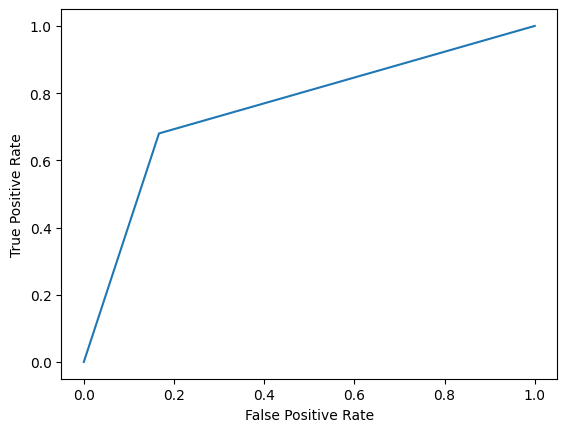

SVM AUC score: 0.7566666666666667


In [11]:
# ROC/AUC Curves
# fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
plot_roc_curve(y_test, y_pred)
plt.show()
print(f'SVM AUC score: {roc_auc_score(y_test, y_pred)}') 

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7761194029850746


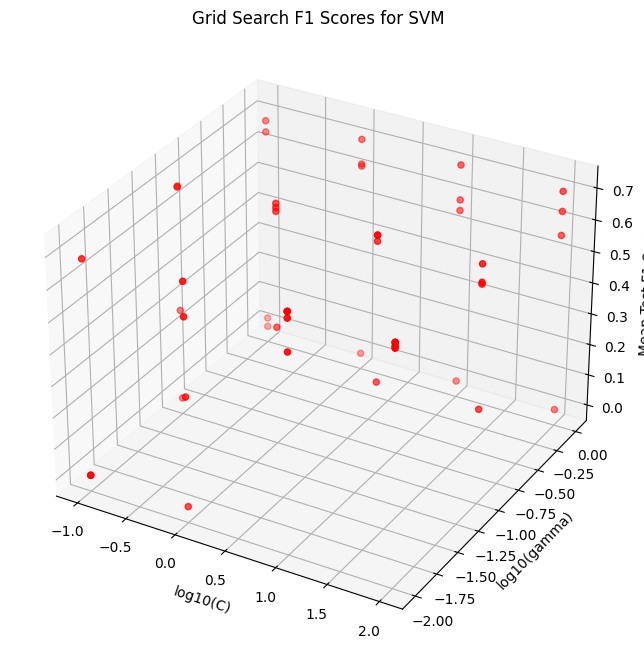

In [13]:
# Extract the F1 scores and hyperparameters from the cv_results_
f1_scores = g_res.cv_results_['mean_test_f1']
params = g_res.cv_results_['params']

# Extract the values for each hyperparameter
C_values = [param['C'] for param in params]
gamma_values = [param['gamma'] for param in params]

# Convert lists to numpy arrays for plotting
C_values = np.array(C_values)
gamma_values = np.array(gamma_values)

# Create a 3D plot to visualize the F1 scores
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the F1 scores as a function of C and gamma
ax.scatter(np.log10(C_values), np.log10(gamma_values), f1_scores, c='r', marker='o')

ax.set_xlabel('log10(C)')
ax.set_ylabel('log10(gamma)')
ax.set_zlabel('Mean Test F1 Score')

plt.title('Grid Search F1 Scores for SVM')
plt.show()


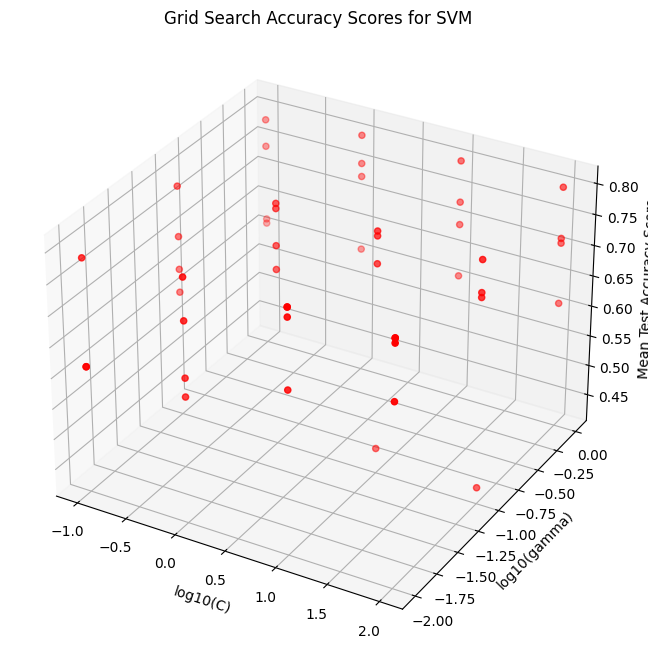

In [14]:
# Extract the F1 scores and hyperparameters from the cv_results_
f1_scores = g_res.cv_results_['mean_test_accuracy']
params = g_res.cv_results_['params']

# Extract the values for each hyperparameter
C_values = [param['C'] for param in params]
gamma_values = [param['gamma'] for param in params]

# Convert lists to numpy arrays for plotting
C_values = np.array(C_values)
gamma_values = np.array(gamma_values)

# Create a 3D plot to visualize the F1 scores
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the F1 scores as a function of C and gamma
ax.scatter(np.log10(C_values), np.log10(gamma_values), f1_scores, c='r', marker='o')

ax.set_xlabel('log10(C)')
ax.set_ylabel('log10(gamma)')
ax.set_zlabel('Mean Test Accuracy Score')

plt.title('Grid Search Accuracy Scores for SVM')
plt.show()


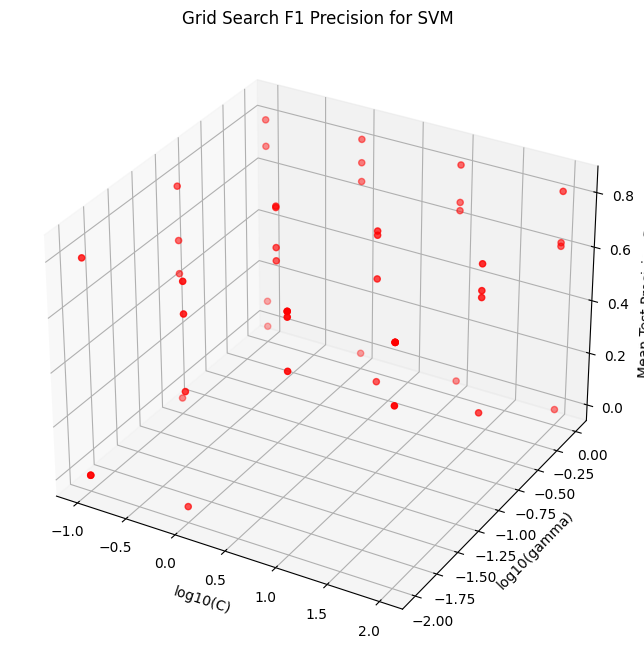

In [15]:
# Extract the F1 scores and hyperparameters from the cv_results_
f1_scores = g_res.cv_results_['mean_test_precision']
params = g_res.cv_results_['params']

# Extract the values for each hyperparameter
C_values = [param['C'] for param in params]
gamma_values = [param['gamma'] for param in params]

# Convert lists to numpy arrays for plotting
C_values = np.array(C_values)
gamma_values = np.array(gamma_values)

# Create a 3D plot to visualize the F1 scores
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the F1 scores as a function of C and gamma
ax.scatter(np.log10(C_values), np.log10(gamma_values), f1_scores, c='r', marker='o')

ax.set_xlabel('log10(C)')
ax.set_ylabel('log10(gamma)')
ax.set_zlabel('Mean Test Precision Score')

plt.title('Grid Search F1 Precision for SVM')
plt.show()


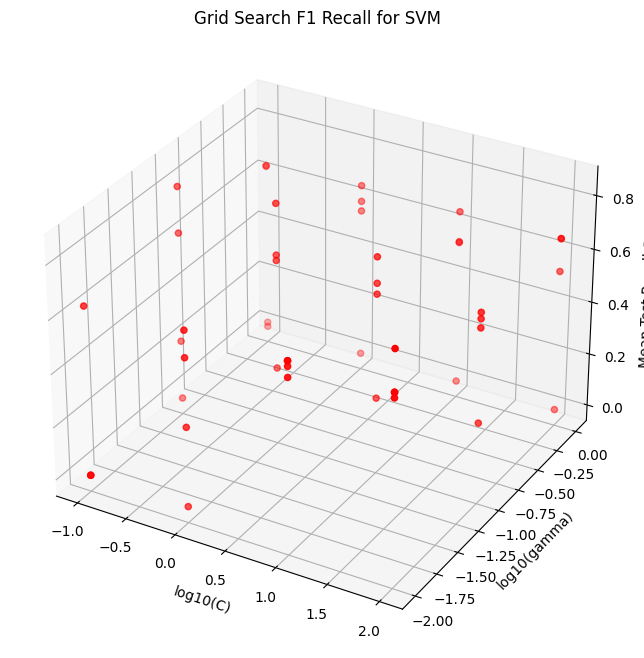

In [16]:
# Extract the F1 scores and hyperparameters from the cv_results_
f1_scores = g_res.cv_results_['mean_test_recall']
params = g_res.cv_results_['params']

# Extract the values for each hyperparameter
C_values = [param['C'] for param in params]
gamma_values = [param['gamma'] for param in params]

# Convert lists to numpy arrays for plotting
C_values = np.array(C_values)
gamma_values = np.array(gamma_values)

# Create a 3D plot to visualize the F1 scores
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the F1 scores as a function of C and gamma
ax.scatter(np.log10(C_values), np.log10(gamma_values), f1_scores, c='r', marker='o')

ax.set_xlabel('log10(C)')
ax.set_ylabel('log10(gamma)')
ax.set_zlabel('Mean Test Recall Score')

plt.title('Grid Search F1 Recall for SVM')
plt.show()
